Parte (a) - Leitura de uma base de dados e separação dos dados em treinamento e teste.

Utilizei o dataset California Housing

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

# Carregar o dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="PRICE")

# Separar em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do treino: {X_train.shape}")
print(f"Tamanho do teste: {X_test.shape}")


Tamanho do treino: (16512, 8)
Tamanho do teste: (4128, 8)


Parte (b) - Treinar um modelo "caixa-preta"

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Verificar a acurácia no conjunto de teste
score = model.score(X_test, y_test)
print(f"Acurácia do modelo: {score:.2f}")


Acurácia do modelo: 0.81


Parte (c) - Aplicar Feature Importance e construir gráficos PDP

Variáveis mais importantes: ['MedInc', 'AveOccup', 'Latitude']


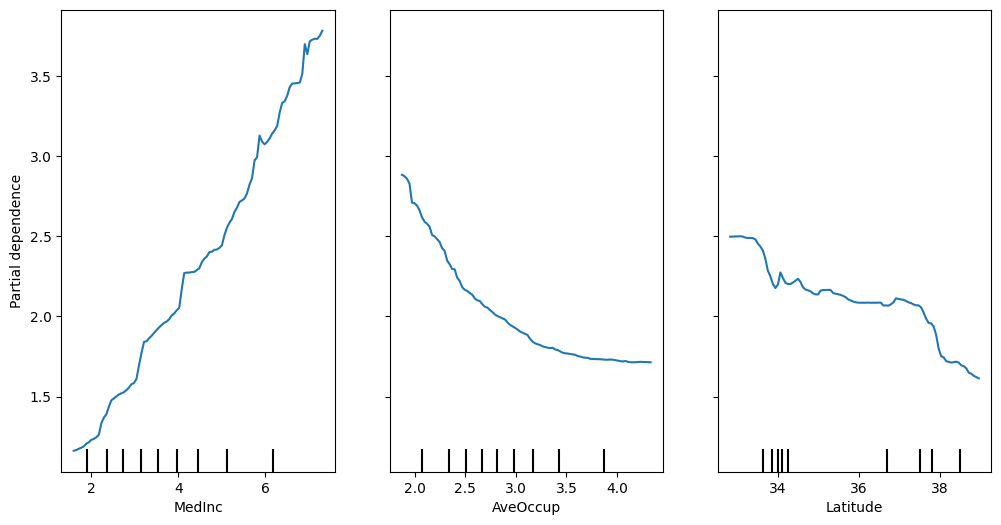

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Calcular as importâncias das características
importances = model.feature_importances_
indices = importances.argsort()[::-1][:3]  # Selecionar as 3 variáveis mais importantes

# Selecionar os nomes das características mais importantes
features = [X.columns[i] for i in indices]

print(f"Variáveis mais importantes: {features}")

# Gerar os gráficos PDP usando PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax)
plt.show()
